In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [276]:
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore')

In [277]:
df = pd.read_csv('telecom_churn_data.csv')

In [278]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [279]:
df.shape

(99999, 226)

In [280]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

## Data Cleaning

In [281]:
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [282]:
# function to sort missing percentages
def sortMissing(data, size):
    missing_df = round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)
    print(missing_df.head(size))

In [283]:
# get the percentage of missing values
sortMissing(df, 50)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [284]:
# dropping all columns having high percentages of missing values >70%
for column in df:
    col = df[column]
    if col.isnull().sum() * 100 / len(df) > 70.0:
        df.drop([column], axis=1, inplace=True)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 141.9+ MB


In [286]:
sortMissing(df, 10)

loc_ic_t2m_mou_9    7.75
std_og_t2t_mou_9    7.75
std_ic_t2f_mou_9    7.75
std_ic_t2t_mou_9    7.75
roam_og_mou_9       7.75
loc_ic_mou_9        7.75
loc_og_t2t_mou_9    7.75
loc_ic_t2f_mou_9    7.75
roam_ic_mou_9       7.75
ic_others_9         7.75
dtype: float64


### Dropping columns having single value

In [287]:
df.columns[df.nunique() <= 1].shape

(16,)

In [288]:
for column in df.columns[df.nunique() <= 1]:
    df.drop([column], axis=1, inplace=True)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 170 entries, mobile_number to sep_vbc_3g
dtypes: float64(132), int64(34), object(4)
memory usage: 129.7+ MB


### Filter High Value customers

In [290]:
avg_rech_amt = (df.total_rech_amt_6 + df.total_rech_amt_7) / 2
df['avg_rech_amt'] = avg_rech_amt
df['avg_rech_amt'].quantile(0.7)

368.5

In [291]:
df_high_val = df[df['avg_rech_amt'] >= df['avg_rech_amt'].quantile(0.7)]
df_high_val.reset_index(inplace=True, drop=True)

In [292]:
df_high_val.shape

(30011, 171)

In [293]:
df_high_val.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
1,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
2,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
3,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
4,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


### Derive Churn

In [294]:
df_high_val.filter(regex=("._9")).columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9',
       'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9'],
      dtype='object')

In [295]:
df_high_val.total_og_mou_9.value_counts()

0.00       3249
0.21         20
1.01          7
0.61          7
5.93          6
           ... 
345.84        1
97.94         1
1391.18       1
248.33        1
1281.78       1
Name: total_og_mou_9, Length: 22615, dtype: int64

In [296]:
# total_og_mou_9, total_ic_mou_9, monthly_2g_9, monthly_3g_9
df_high_val['churn'] = ((df_high_val['total_og_mou_9'] < 1.0) &  (df_high_val['total_ic_mou_9'] < 1.0) & (df_high_val['monthly_2g_9'] < 1.0) & (df_high_val['monthly_3g_9'] < 1.0)).astype(int)
df_high_val['churn'].value_counts()

0    27302
1     2709
Name: churn, dtype: int64

In [297]:
df_high_val.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
0,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
1,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
2,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
3,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
4,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [298]:
### Checking the Churn Rate
churn = (sum(df_high_val['churn'])/len(df_high_val['churn'].index))*100
churn

9.02669021358835

In [299]:
df_high_val[['total_og_mou_9', 'total_ic_mou_9', 'monthly_2g_9', 'monthly_3g_9']].head()

,total_og_mou_9,total_ic_mou_9,monthly_2g_9,monthly_3g_9
0,0.00,0.00,0,0
1,142.18,34.91,0,0
2,446.09,631.86,0,0
3,255.74,334.56,0,0
4,631.08,87.13,0,0


### Drop all columns for Month 9

In [300]:
df_high_val.drop(df_high_val.filter(regex=("._9")).columns, inplace=True, axis=1)

In [301]:
df_high_val.shape

(30011, 131)

In [302]:
df_high_val.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 131 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mobile_number        30011 non-null  int64  
 1   arpu_6               30011 non-null  float64
 2   arpu_7               30011 non-null  float64
 3   arpu_8               30011 non-null  float64
 4   onnet_mou_6          29695 non-null  float64
 5   onnet_mou_7          29708 non-null  float64
 6   onnet_mou_8          29073 non-null  float64
 7   offnet_mou_6         29695 non-null  float64
 8   offnet_mou_7         29708 non-null  float64
 9   offnet_mou_8         29073 non-null  float64
 10  roam_ic_mou_6        29695 non-null  float64
 11  roam_ic_mou_7        29708 non-null  float64
 12  roam_ic_mou_8        29073 non-null  float64
 13  roam_og_mou_6        29695 non-null  float64
 14  roam_og_mou_7        29708 non-null  float64
 15  roam_og_mou_8        29073 non-null

In [303]:
df_high_val.shape

(30011, 131)

In [304]:
# removing mobile number
df_high_val.drop(['mobile_number', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], inplace=True, axis=1)

In [305]:
# let's check the distribution of churn column
sortMissing(df_high_val, 50)

isd_og_mou_8        3.13
loc_ic_t2f_mou_8    3.13
spl_ic_mou_8        3.13
ic_others_8         3.13
std_og_t2m_mou_8    3.13
std_og_t2f_mou_8    3.13
std_og_t2t_mou_8    3.13
std_ic_mou_8        3.13
loc_og_mou_8        3.13
std_ic_t2f_mou_8    3.13
loc_og_t2c_mou_8    3.13
std_ic_t2m_mou_8    3.13
loc_og_t2f_mou_8    3.13
std_ic_t2t_mou_8    3.13
loc_og_t2m_mou_8    3.13
loc_og_t2t_mou_8    3.13
loc_ic_mou_8        3.13
offnet_mou_8        3.13
loc_ic_t2t_mou_8    3.13
spl_og_mou_8        3.13
og_others_8         3.13
onnet_mou_8         3.13
std_og_mou_8        3.13
roam_og_mou_8       3.13
isd_ic_mou_8        3.13
roam_ic_mou_8       3.13
loc_ic_t2m_mou_8    3.13
std_ic_t2m_mou_6    1.05
loc_ic_t2t_mou_6    1.05
std_ic_t2f_mou_6    1.05
loc_ic_t2m_mou_6    1.05
std_ic_t2t_mou_6    1.05
std_ic_mou_6        1.05
isd_og_mou_6        1.05
isd_ic_mou_6        1.05
std_og_t2f_mou_6    1.05
og_others_6         1.05
std_og_mou_6        1.05
spl_ic_mou_6        1.05
spl_og_mou_6        1.05


In [306]:
# Imputing missing values with KNN imputer
imputer = KNNImputer(n_neighbors=2)

In [307]:
df_high_val_imputed = pd.DataFrame(imputer.fit_transform(df_high_val),columns = df_high_val.columns)

In [308]:
df_high_val_imputed.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1.0
1,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,519.0,0.0
2,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0.0,380.0,0.0
3,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0.0,0.0,0.0,511.0,0.00,2.45,21.89,0.0,459.0,0.0
4,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0.0,0.0,0.0,667.0,0.00,0.00,0.00,0.0,408.0,0.0


In [309]:
sortMissing(df_high_val_imputed, 10)

churn               0.0
spl_og_mou_7        0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
dtype: float64


## Data Preparation

In [310]:
df_high_val_imputed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 127 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

In [311]:
# Finding outliers
df_high_val_imputed.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt,churn
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.570022,304.701251,268.467774,418.892374,424.709081,376.694954,17.706985,...,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356,0.090267
std,442.722413,462.897814,492.259586,460.614696,481.593939,466.180291,469.956346,485.984268,476.437782,80.065676,...,0.875528,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088,0.286569
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,368.500000,0.000000
25%,364.161000,365.004500,289.609500,41.950000,41.480000,28.670000,138.430000,136.360000,98.285000,0.000000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000
50%,495.682000,493.561000,452.091000,126.060000,125.730000,100.360000,282.560000,282.330000,241.580000,0.000000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,568.500000,0.000000
75%,703.922000,700.788000,671.150000,353.380000,359.925000,298.140000,523.295000,532.775000,482.735000,0.000000,...,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000,795.500000,0.000000
90%,994.099000,995.557000,985.202000,795.340000,824.380000,723.610000,916.030000,935.690000,853.790000,33.390000,...,0.000000,0.000000,0.000000,2846.000000,438.970000,454.830000,394.500000,0.000000,1118.000000,0.000000
95%,1240.793500,1261.421500,1258.555500,1154.405000,1208.175000,1115.660000,1271.470000,1286.285000,1188.460000,95.565000,...,1.000000,1.000000,1.000000,3179.000000,818.750000,845.315000,761.740000,18.635000,1406.000000,1.000000
99%,1983.089500,1999.374500,1987.934400,2166.370000,2220.367000,2188.504000,2326.290000,2410.104000,2211.642000,350.374000,...,3.000000,3.000000,3.000000,3651.000000,1822.115000,1941.598000,1866.386000,173.662000,2216.300000,1.000000


In [312]:
# List of columns with outliers
out_list = []
for col in df_high_val_imputed:
    IQR = df_high_val_imputed[col].quantile(0.75) - df_high_val_imputed[col].quantile(0.5)
    if df_high_val_imputed[col].max()  >  df_high_val_imputed[col].quantile(0.75) + 1.5*IQR:
        out_list.append(col)
out_list

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

## Modelling

In [313]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_high_val_imputed.drop(['churn'],axis=1)

# Putting response variable to y
y = df_high_val_imputed['churn']

**Feature Standardization**

In [314]:
normalized_X = (X-X.mean())/X.std()

In [315]:
normalized_X

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,1.088482,1.643375,5.356163,-0.518286,-0.519154,-0.463721,0.073491,0.293118,-0.106593,-0.018447,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.473785,-0.183620,-0.283677,-0.263315,-0.134927,0.999087
1,-0.471093,-0.209360,-0.807492,0.254269,0.096199,-0.500638,-0.689920,-0.708005,-0.504190,-0.221156,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.973137,-0.277633,1.900678,0.002051,-0.134927,-0.363484
2,-0.213313,-0.828400,0.118642,0.445470,-0.407628,0.570106,-0.011878,-0.628475,0.221991,0.072728,...,-0.297124,-0.157523,-0.154971,-0.144056,1.376998,-0.331490,-0.331174,-0.311400,-0.134927,-0.647864
3,-0.353064,-0.624903,-0.704838,-0.534199,-0.479016,-0.424423,-0.260880,-0.401184,-0.449030,-0.221156,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.772166,-0.331490,-0.325170,-0.255232,-0.134927,-0.486238
4,0.232027,-1.231709,-1.034735,1.930768,-0.613424,-0.559178,-0.760182,-0.873915,-0.779021,-0.221156,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.612209,-0.331490,-0.331174,-0.311400,-0.134927,-0.590579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30006,-0.736388,-0.385661,-0.495687,-0.632980,-0.336614,-0.366506,-0.190044,0.155213,-0.044528,-0.157958,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.248205,-0.331490,-0.331174,-0.311400,-0.134927,-0.623313
30007,-0.390722,-0.579053,-0.332835,-0.605734,-0.632693,-0.573100,0.020252,-0.119199,-0.033824,-0.221156,...,-0.297124,-0.157523,-0.154971,-0.144056,1.835336,-0.331490,-0.331174,-0.311400,-0.134927,-0.473962
30008,0.130304,-0.289281,0.059880,1.107563,0.508019,1.087438,0.778514,0.395941,0.459126,-0.221156,...,-0.297124,-0.157523,-0.154971,-0.144056,1.468255,0.942460,1.136067,1.238612,-0.134927,0.310641
30009,-0.620539,-0.164623,-0.269731,-0.209893,-0.270438,-0.570611,-0.517096,-0.303917,-0.269426,-0.221156,...,-0.297124,-0.157523,-0.154971,-0.144056,-0.959807,-0.063280,-0.331174,-0.311400,-0.134927,-0.469871


In [316]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, stratify=y, train_size=0.7,test_size=0.3,random_state=100)

## Handle Class Imbalance using SMOTE

In [317]:
!pip install imblearn

In [318]:
from imblearn.over_sampling import SMOTE

In [319]:
smt = SMOTE(random_state=100)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

### Prediction using PCA

In [320]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [321]:
# instantiate PCA with 90% variance to capture
pca = PCA(0.9, random_state=100)

In [322]:
# fit transform X_train_SMOTE
df_train_pca = pca.fit_transform(X_train_SMOTE)

In [323]:
df_train_pca.shape

(38222, 49)

In [324]:
pca.components_

array([[ 0.15520753,  0.20686886,  0.20392075, ...,  0.03102113,
         0.02067647,  0.19926928],
       [ 0.06965182,  0.07105265,  0.01929342, ..., -0.06913481,
        -0.01800383,  0.0768212 ],
       [ 0.12330062,  0.13743213,  0.1264113 , ...,  0.07196777,
         0.0182577 ,  0.14939177],
       ...,
       [-0.04639296,  0.09694395, -0.03162054, ..., -0.08653854,
        -0.43910811,  0.02535821],
       [ 0.07308407,  0.07604673,  0.0364268 , ...,  0.03884383,
         0.28022925,  0.07242051],
       [-0.07733865, -0.11824981, -0.03158927, ...,  0.10721003,
         0.11455786, -0.10498451]])

In [325]:
pca.explained_variance_ratio_

array([0.09500636, 0.08729625, 0.06341932, 0.04519049, 0.04164708,
       0.04096908, 0.0396417 , 0.0343979 , 0.03063965, 0.02803036,
       0.0223203 , 0.02185211, 0.01976461, 0.01785873, 0.01778925,
       0.01714886, 0.01657942, 0.01506894, 0.01463291, 0.01333118,
       0.01285755, 0.01249038, 0.01193719, 0.01133917, 0.01050113,
       0.01031715, 0.00940467, 0.00887775, 0.00860135, 0.0081178 ,
       0.00789601, 0.00772362, 0.00745071, 0.00727841, 0.00709502,
       0.00688516, 0.00673815, 0.00643568, 0.00629839, 0.00585874,
       0.00575245, 0.00546688, 0.00528005, 0.0050105 , 0.00467336,
       0.00446939, 0.00446001, 0.00433073, 0.00426539])

In [326]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

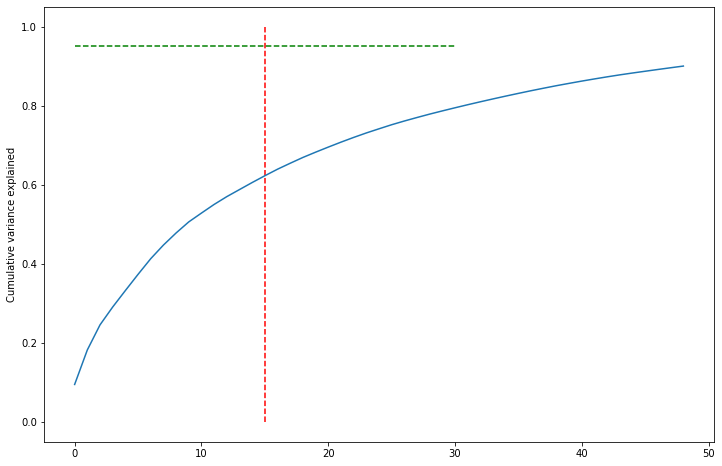

In [327]:
# Scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [328]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [329]:
learner_pca = LogisticRegression()

In [330]:
model_pca = learner_pca.fit(df_train_pca, y_train_SMOTE)

**Making Predictions**

In [331]:
df_test_pca = pca.transform(X_test)

In [332]:
df_test_pca.shape

(9004, 49)

In [333]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
y_pred_1 = pd.DataFrame(pred_probs_test)
y_pred_1.head()

,0
0,0.005864
1,0.251924
2,0.122051
3,0.321963
4,0.624360


In [334]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
23530,0.0
4825,0.0
14228,0.0
21259,0.0
23625,0.0


In [335]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,23530,0.0,0.005864
1,4825,0.0,0.251924
2,14228,0.0,0.122051
3,21259,0.0,0.321963
4,23625,0.0,0.624360


In [336]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,churn,Churn_Prob,predicted
0,23530,0.0,0.005864,0
1,4825,0.0,0.251924,0
2,14228,0.0,0.122051,0
3,21259,0.0,0.321963,0
4,23625,0.0,0.624360,1


**Model Evaluation**

In [337]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6713, 1478],
       [ 142,  671]])

In [338]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8200799644602399

In [339]:
metrics.precision_score(y_pred_final.churn, y_pred_final.predicted)

0.31223825034899955

In [340]:
metrics.recall_score(y_pred_final.churn, y_pred_final.predicted)

0.8253382533825339

In [341]:
metrics.f1_score(y_pred_final.churn, y_pred_final.predicted)

0.45307224848075617

In [342]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

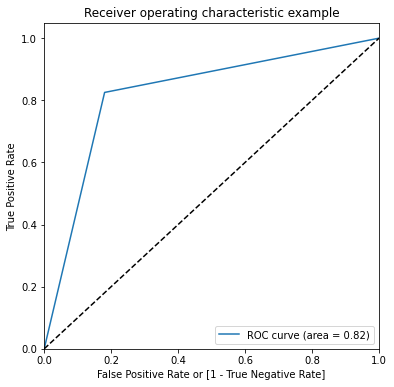

(array([0.        , 0.18044195, 1.        ]),
 array([0.        , 0.82533825, 1.        ]),
 array([2, 1, 0]))

In [343]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [344]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

### Feature Selection

In [345]:
# Splitting the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [346]:
import statsmodels.api as sm

In [347]:
# Logistic regression model
logm1 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train_SMOTE)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38096
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 18 Feb 2021   Deviance:                          nan
Time:                        22:45:08   Pearson chi2:                 5.14e+10
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0382      0.034    -60.261      0.000      -2.104      -1.972
arpu_6                -0.2193      0.073     -3.013      0.003      -0.362      -0.077
arpu_7                 0.1321      0.088      1.506      0.132      -0.040       0.304
arpu_8                 0.8732      0.101      8.675      0.000       0.676       1.071
onnet_mou_6           -1.4851      1.749     -0.849      0.396      -4.913       1.943
onnet_mou_7           -4.5402      1.305     -3.480      0.001      -7.097      -1.983
onnet_mou_8            0.2637      1.488      0.177      0.859      -2.653       3.180
offnet_mou_6          -1.5502      1.773     -0.874      0.382      -5.025       1.925
offnet_mou_7          -4.7182      1.269     -3.718      0.000      -7.205      -2.231
offnet_mou_8          -0.0900      1.492     -0.060      0.952      -3.015       2.835
roam_ic_mou_6          0.0801      0.024      3.280      0.001       0.032       0.128
roam_ic_mou_7          0.0192      0.030      0.636      0.525      -0.040       0.079
roam_ic_mou_8          0.0212      0.024      0.881      0.378      -0.026       0.068
roam_og_mou_6          0.3616      0.451      0.803      0.422      -0.522       1.245
roam_og_mou_7          1.1523      0.260      4.426      0.000       0.642       1.663
roam_og_mou_8          0.0065      0.337      0.019      0.985      -0.654       0.667
loc_og_t2t_mou_6    1276.5526    720.153      1.773      0.076    -134.921    2688.026
loc_og_t2t_mou_7    1857.5312    754.100      2.463      0.014     379.523    3335.540
loc_og_t2t_mou_8    6262.3006    745.462      8.401      0.000    4801.223    7723.379
loc_og_t2m_mou_6    1347.0328    760.100      1.772      0.076    -142.735    2836.801
loc_og_t2m_mou_7    1800.8086    731.105      2.463      0.014     367.869    3233.748
loc_og_t2m_mou_8    6257.6505    744.851      8.401      0.000    4797.769    7717.532
loc_og_t2f_mou_6     122.2885     68.938      1.774      0.076     -12.827     257.404
loc_og_t2f_mou_7     168.9517     68.667      2.460      0.014      34.366     303.537
loc_og_t2f_mou_8     539.9510     64.273      8.401      0.000     413.978     665.924
loc_og_t2c_mou_6       0.0053      0.019      0.286      0.775      -0.031       0.042
loc_og_t2c_mou_7       0.0805      0.027      2.991      0.003       0.028       0.133
loc_og_t2c_mou_8       0.0351      0.025      1.403      0.161      -0.014       0.084
loc_og_mou_6       -2047.2213   1154.642     -1.773      0.076   -4310.279     215.836
loc_og_mou_7       -2803.5691   1141.428     -2.456      0.014   -5040.726    -566.412
loc_og_mou_8       -9761.2373   1162.500     -8.397      0.000    -1.2e+04   -7482.779
std_og_t2t_mou_6    2499.2104   1468.124      1.702      0.089    -378.261    5376.682
std_og_t2t_mou_7   -2846.3713   1549.4

**Correlation Matrix**

<href>https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas</href>

In [348]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_high_val_imputed, 40))

Top Absolute Correlations
arpu_8            total_rech_amt_8    0.953725
isd_og_mou_7      isd_og_mou_8        0.941612
arpu_6            total_rech_amt_6    0.941256
arpu_7            total_rech_amt_7    0.937114
isd_og_mou_6      isd_og_mou_7        0.917551
                  isd_og_mou_8        0.917194
loc_ic_mou_6      total_ic_mou_6      0.894930
total_rech_amt_7  avg_rech_amt        0.892365
arpu_7            avg_rech_amt        0.890903
loc_ic_mou_8      total_ic_mou_8      0.887645
total_rech_amt_6  avg_rech_amt        0.882449
loc_ic_mou_7      total_ic_mou_7      0.881862
arpu_6            avg_rech_amt        0.868980
onnet_mou_8       std_og_t2t_mou_8    0.857278
onnet_mou_7       std_og_t2t_mou_7    0.853077
loc_ic_t2m_mou_8  loc_ic_mou_8        0.852665
loc_ic_t2m_mou_6  loc_ic_mou_6        0.851521
offnet_mou_7      std_og_t2m_mou_7    0.851181
onnet_mou_6       std_og_t2t_mou_6    0.851023
offnet_mou_8      std_og_t2m_mou_8    0.848822
std_ic_t2m_mou_8  std_ic_mou_8    

In [349]:
top_corr = get_top_abs_correlations(df_high_val_imputed, 40)
top_cor_list = top_corr[top_corr>0.80].index.droplevel().tolist()

**Dropping highly correlated variables**

In [350]:
X_test2 = X_test.drop(top_cor_list,1)
X_train2 = X_train_SMOTE.drop(top_cor_list,1)

**Checking the Correlation Matrix**

In [351]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train2, 20))

Top Absolute Correlations
og_others_7       og_others_8         0.984084
loc_og_t2m_mou_6  loc_og_mou_6        0.809806
std_ic_t2t_mou_6  std_ic_t2t_mou_7    0.786537
loc_ic_t2m_mou_6  loc_ic_t2m_mou_7    0.775693
loc_og_t2m_mou_7  loc_og_mou_7        0.773728
loc_og_t2t_mou_7  loc_og_mou_7        0.763938
loc_og_mou_6      loc_og_mou_7        0.760537
loc_og_t2t_mou_6  loc_og_t2t_mou_7    0.754792
loc_ic_t2f_mou_7  loc_ic_t2f_mou_8    0.747242
loc_og_t2m_mou_6  loc_og_t2m_mou_7    0.736962
loc_og_t2t_mou_6  loc_og_mou_6        0.735291
isd_ic_mou_6      isd_ic_mou_7        0.733110
sachet_3g_6       sachet_3g_7         0.731998
loc_ic_t2f_mou_6  loc_ic_t2f_mou_7    0.727694
vol_3g_mb_7       vol_3g_mb_8         0.722645
std_og_t2f_mou_7  std_og_t2f_mou_8    0.721784
onnet_mou_7       onnet_mou_8         0.721201
loc_ic_t2t_mou_7  loc_ic_t2t_mou_8    0.720881
sachet_2g_6       sachet_2g_7         0.716599
ic_others_7       ic_others_8         0.708296
dtype: float64


**Re-Running the Model**

In [352]:
logm2 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38124
Model Family:                Binomial   Df Model:                           97
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15163.
Date:                Thu, 18 Feb 2021   Deviance:                       30326.
Time:                        22:45:14   Pearson chi2:                 8.67e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9582      0.032    -61.937      0.000      -2.020      -1.896
arpu_6                -0.0141      0.044     -0.320      0.749      -0.100       0.072
arpu_7                 0.2089      0.045      4.693      0.000       0.122       0.296
arpu_8                -0.1438      0.055     -2.624      0.009      -0.251      -0.036
onnet_mou_6           -1.5587      1.194     -1.305      0.192      -3.900       0.782
onnet_mou_7           -2.6755      0.718     -3.726      0.000      -4.083      -1.268
onnet_mou_8           -1.9424      0.098    -19.863      0.000      -2.134      -1.751
offnet_mou_6          -1.6232      1.218     -1.333      0.183      -4.010       0.763
offnet_mou_7          -2.5395      0.724     -3.509      0.000      -3.958      -1.121
offnet_mou_8          -2.3243      0.094    -24.651      0.000      -2.509      -2.140
roam_ic_mou_6          0.1147      0.023      5.011      0.000       0.070       0.160
roam_ic_mou_7         -0.0142      0.028     -0.512      0.609      -0.069       0.040
roam_ic_mou_8          0.0464      0.025      1.822      0.068      -0.004       0.096
roam_og_mou_6          0.3806      0.309      1.231      0.218      -0.225       0.987
roam_og_mou_7          0.6943      0.145      4.787      0.000       0.410       0.979
roam_og_mou_8          0.6353      0.029     21.735      0.000       0.578       0.693
loc_og_t2t_mou_6    3606.0785    645.529      5.586      0.000    2340.864    4871.293
loc_og_t2t_mou_7       3.4419      0.578      5.954      0.000       2.309       4.575
loc_og_t2m_mou_6    3805.9131    681.338      5.586      0.000    2470.516    5141.310
loc_og_t2m_mou_7       3.1885      0.563      5.661      0.000       2.084       4.292
loc_og_t2f_mou_6     345.2568     61.795      5.587      0.000     224.142     466.372
loc_og_t2f_mou_8       0.1523      0.045      3.362      0.001       0.063       0.241
loc_og_t2c_mou_6       0.0215      0.019      1.143      0.253      -0.015       0.058
loc_og_t2c_mou_7       0.0555      0.028      2.008      0.045       0.001       0.110
loc_og_t2c_mou_8       0.0633      0.027      2.369      0.018       0.011       0.116
loc_og_mou_6       -5780.1441   1035.011     -5.585      0.000   -7808.728   -3751.561
loc_og_mou_7          -2.6385      1.030     -2.562      0.010      -4.657      -0.620
std_og_t2f_mou_6       0.0875      0.032      2.709      0.007       0.024       0.151
std_og_t2f_mou_7      -0.1041      0.042     -2.507      0.012      -0.185      -0.023
std_og_t2f_mou_8      -0.1776      0.055     -3.239      0.001      -0.285      -0.070
std_og_mou_6           2.1472      1.571      1.367      0.172      -0.932       5.227
std_og_mou_7           3.8102      0.941      4.047      0.000       1.965       5.655
std_og_mou_8           2.0485      0.1

### Using RFE

In [353]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)    # running RFE with 20 variables as output
rfe = rfe.fit(normalized_X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False  True  True False  True False False False
 False False False False False False  True False False False False False
 False False False  True False False  True False False False False False
 False False False False False  True False False False False False False
 False False False  True False  True False False  True False False  True
 False False False False  True  True False False False False False False
 False False False False False  True False False  True False False False
 False False  True False False False False False  True False False False
 False False False False False  True False False False False False False
 False False  True False False False False False False False False False
 False False False False  True False]
[ 18  13  28  75  34   1   1  93   1  54  84 102  76  30  90  58  60  87
   1  59  20 104  89  88  97  99  77   1  24  43   1  42  17  35  33   5
  83  92  82  14  22   1  53  29  86 100  44  78  91  96  61   1  23   1
  40  70   1 

In [354]:
# Variables selected by RFE 
col = X.columns[rfe.ranking_==1]
col

Index(['onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_mou_8', 'total_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sep_vbc_3g'],
      dtype='object')

**Top 20 best features**: 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2m_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sep_vbc_3g'

In [355]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9, max_iter=1000)
logsk.fit(X_train_SMOTE[col], y_train_SMOTE)

LogisticRegression(C=1000000000.0, max_iter=1000)

In [356]:
logm4 = sm.GLM(y_train_SMOTE,(sm.add_constant(X_train_SMOTE[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38222
Model:                            GLM   Df Residuals:                    38201
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 18 Feb 2021   Deviance:                          nan
Time:                        22:47:26   Pearson chi2:                 3.48e+09
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8557      0.031    -60.622      0.000      -1.916      -1.796
onnet_mou_8            1.2212      0.072     17.035      0.000       1.081       1.362
offnet_mou_6           1.0014      0.089     11.277      0.000       0.827       1.175
offnet_mou_8           1.1217      0.073     15.340      0.000       0.978       1.265
loc_og_t2m_mou_6      -0.8501      0.062    -13.822      0.000      -0.971      -0.730
loc_og_mou_6           0.8352      0.087      9.564      0.000       0.664       1.006
std_og_t2t_mou_6       0.9003      0.081     11.117      0.000       0.742       1.059
std_og_mou_8           0.8900      0.092      9.690      0.000       0.710       1.070
total_og_mou_6        -1.0193      0.124     -8.188      0.000      -1.263      -0.775
total_og_mou_8        -3.1931      0.134    -23.788      0.000      -3.456      -2.930
loc_ic_t2t_mou_8       1.7961      0.223      8.042      0.000       1.358       2.234
loc_ic_t2m_mou_8       2.8546      0.308      9.264      0.000       2.251       3.459
loc_ic_mou_7           1.1483      0.046     24.930      0.000       1.058       1.239
loc_ic_mou_8           6.9147      0.732      9.448      0.000       5.480       8.349
std_ic_mou_8           5.8307      0.277     21.029      0.000       5.287       6.374
total_ic_mou_8       -15.4615      0.704    -21.958      0.000     -16.842     -14.081
isd_ic_mou_8           3.2092      0.149     21.597      0.000       2.918       3.500
total_rech_num_8      -0.4581      0.023    -19.707      0.000      -0.504      -0.413
last_day_rch_amt_8    -0.7740      0.028    -27.497      0.000      -0.829      -0.719
monthly_2g_8          -0.5425      0.030    -17.985      0.000      -0.602      -0.483
sep_vbc_3g            -1.1110      0.102    -10.909      0.000      -1.311      -0.911
======================================================================================
"""

In [357]:
res = modres.predict(sm.add_constant(X_test[col]))
res

23530    0.000004
4825     0.351353
14228    0.306802
21259    0.286247
23625    0.508617
           ...   
9124     0.008147
13489    0.653118
23892    0.108360
6549     0.001851
19558    0.000003
Length: 9004, dtype: float64

**Making Predictions**

In [358]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.000004
1,0.351476
2,0.306808
3,0.286257
4,0.508680


In [359]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
23530,0.0
4825,0.0
14228,0.0
21259,0.0
23625,0.0


In [360]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,23530,0.0,0.000004
1,4825,0.0,0.351476
2,14228,0.0,0.306808
3,21259,0.0,0.286257
4,23625,0.0,0.508680


In [361]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,churn,Churn_Prob,predicted
0,23530,0.0,0.000004,0
1,4825,0.0,0.351476,0
2,14228,0.0,0.306808,0
3,21259,0.0,0.286257,0
4,23625,0.0,0.508680,1


**Model Evaluation**

In [362]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6788, 1403],
       [ 144,  669]])

In [363]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8281874722345625

In [364]:
metrics.precision_score(y_pred_final.churn, y_pred_final.predicted)

0.32287644787644787

In [365]:
metrics.recall_score(y_pred_final.churn, y_pred_final.predicted)

0.8228782287822878

In [366]:
metrics.f1_score(y_pred_final.churn, y_pred_final.predicted)

0.4637781629116117

In [367]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

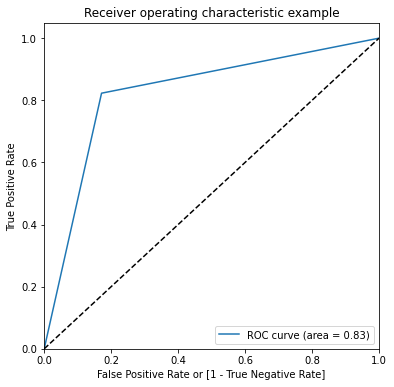

(array([0.        , 0.17128556, 1.        ]),
 array([0.        , 0.82287823, 1.        ]),
 array([2, 1, 0]))

In [368]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [369]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.88'